In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [3]:
col_names = ['frame', 'x_start_point', 'y_start_point', 'likelhood_start_point', 'x_stop_point', 'y_stop_point', 'likelhood_stop_point']

In [4]:
start_df = pd.read_csv("/content/drive/MyDrive/WFI_data_for_project/Metadata/m3_RHL_60mkA_200ms_beforePTDLC_resnet50_start_detectionSep23shuffle1_47500.csv",  names=col_names, skiprows=3)


In [5]:
start_df.head()

,frame,x_start_point,y_start_point,likelhood_start_point,x_stop_point,y_stop_point,likelhood_stop_point
0,0,466.040192,232.736938,0.013565,466.658447,231.806580,0.999780
1,1,466.285309,232.352173,0.014602,466.886047,231.471603,0.999778
2,2,466.073730,232.389618,0.013866,466.518677,231.618332,0.999770
3,3,465.741913,232.967041,0.012371,466.218872,231.951797,0.999753
4,4,465.981018,232.824493,0.011832,466.335510,231.950195,0.999766


In [6]:
start_df.tail()

,frame,x_start_point,y_start_point,likelhood_start_point,x_stop_point,y_stop_point,likelhood_stop_point
3149,3149,466.204254,232.109009,0.015169,466.200226,231.417847,0.999766
3150,3150,465.800140,232.587234,0.012809,465.803345,231.838501,0.999718
3151,3151,465.811523,232.363083,0.012981,465.924835,231.602951,0.999757
3152,3152,465.628235,232.496262,0.012854,465.519531,231.756424,0.999708
3153,3153,465.660034,232.428177,0.013948,465.513855,231.713287,0.999736


In [7]:
df_session = start_df[start_df['likelhood_start_point'] > 0.9]

In [8]:
df_session.head()

,frame,x_start_point,y_start_point,likelhood_start_point,x_stop_point,y_stop_point,likelhood_stop_point
149,149,464.576324,234.251099,0.991173,463.558990,229.584747,0.477726
150,150,463.382111,234.146271,0.996424,463.288727,229.592651,0.153351
151,151,463.320465,234.115936,0.996401,463.239044,229.273926,0.117680
152,152,463.157928,234.145676,0.996287,463.213867,229.516830,0.140634
153,153,463.523376,233.930969,0.996023,463.443176,229.300980,0.130728


In [9]:
df_session.tail()

,frame,x_start_point,y_start_point,likelhood_start_point,x_stop_point,y_stop_point,likelhood_stop_point
2341,2341,462.277405,234.304260,0.997097,463.030640,229.286682,0.147664
2342,2342,462.252289,234.208939,0.997091,463.009644,229.294830,0.147157
2343,2343,462.408813,234.364548,0.997042,462.973969,229.299088,0.158386
2344,2344,462.411377,234.427551,0.997383,463.186218,229.092880,0.134349
2345,2345,462.218872,234.302765,0.997060,463.004059,229.091461,0.149322


In [10]:
start = df_session['frame'].iloc[0]

In [11]:
end = df_session['frame'].iloc[-1]

In [12]:
df_session.info

<bound method DataFrame.info of       frame  x_start_point  y_start_point  likelhood_start_point  \
149     149     464.576324     234.251099               0.991173   
150     150     463.382111     234.146271               0.996424   
151     151     463.320465     234.115936               0.996401   
152     152     463.157928     234.145676               0.996287   
153     153     463.523376     233.930969               0.996023   
...     ...            ...            ...                    ...   
2341   2341     462.277405     234.304260               0.997097   
2342   2342     462.252289     234.208939               0.997091   
2343   2343     462.408813     234.364548               0.997042   
2344   2344     462.411377     234.427551               0.997383   
2345   2345     462.218872     234.302765               0.997060   

      x_stop_point  y_stop_point  likelhood_stop_point  
149     463.558990    229.584747              0.477726  
150     463.288727    229.592651     

In [13]:
IR_frames_num = end- start + 1
print(IR_frames_num)

2197


# Добавляем координаты

In [14]:
coord_df = pd.read_csv("/content/drive/MyDrive/WFI_data_for_project/Metadata/m3_RHL_60mkA_200ms_beforePTDLC_resnet50_Under_WFISep12shuffle1_1030000.csv",  header=[1,2])


In [15]:
coord_df

bodyparts        Nose                                LFL              \
        coords           x           y likelihood           x           y   
0            0  577.036438  308.734406   0.999998  509.687744  386.877411   
1            1  577.251343  308.737457   0.999999  509.902130  387.268555   
2            2  577.423523  308.797943   0.999999  509.507935  387.168915   
3            3  577.210693  308.955261   0.999999  509.590179  386.964813   
4            4  577.676697  309.422913   0.999998  509.599396  386.957520   
...        ...         ...         ...        ...         ...         ...   
3149      3149  577.051453  310.738617   0.999998  523.357971  358.752228   
3150      3150  577.158813  310.675262   0.999998  538.930908  358.288208   
3151      3151  576.832153  310.324158   0.999998  538.764404  357.455353   
3152      3152  576.850464  310.187805   0.999998  538.462402  357.917389   
3153      3153  576.909790  310.219543   0.999998  538.721802  357.582214   

                        RFL                         ...        RHL  \
     likelihood           x           y likelihood  ... likelihood   
0      0.999999  390.948914  377.168274   0.999697  ...   0.999998   
1      0.999999  391.222748  377.348175   0.999809  ...   0.999997   
2      0.999999  391.246552  377.471985   0.999851  ...   0.999998   
3      0.999999  390.932922  377.482697   0.999893  ...   0.999998   
4      0.999999  391.067505  377.593536   0.999870  ...   0.999998   
...         ...         ...         ...        ...  ...        ...   
3149   0.000563  439.783295  381.417877   0.999998  ...   0.999998   
3150   0.001632  440.541656  381.647705   0.999997  ...   0.999999   
3151   0.001341  440.235748  381.617065   0.999997  ...   0.999998   
3152   0.001086  440.082214  381.436310   0.999998  ...   0.999999   
3153   0.000630  440.304840  381.494446   0.999997  ...   0.999998   

            Tail                                Jaw                         \
               x           y likelihood           x           y likelihood   
0     209.229141  298.302612   0.999629  543.999756  333.644531   0.999992   
1     210.051620  298.151123   0.999777  543.406616  333.624176   0.999988   
2     209.971466  298.046936   0.999097  543.311829  333.833099   0.999991   
3     209.315353  297.744141   0.999032  543.608643  333.754578   0.999990   
4     210.264404  297.609894   0.999183  543.189392  333.688812   0.999989   
...          ...         ...        ...         ...         ...        ...   
3149  196.990692  296.555237   0.908625  537.739563  331.799194   0.999975   
3150  195.672226  296.269989   0.991563  536.271912  334.378418   0.999970   
3151  196.119141  297.463562   0.989232  536.977478  333.203400   0.999982   
3152  195.694229  297.094879   0.964465  537.739563  333.138458   0.999982   
3153  194.721619  297.423096   0.969141  537.794434  332.696533   0.999987   

     Amperemeter                         
               x           y likelihood  
0      77.946701  127.841560   0.999999  
1      78.019188  127.966316   0.999999  
2      78.192688  127.984093   0.999999  
3      78.348030  128.087448   0.999999  
4      77.972054  127.944794   0.999999  
...          ...         ...        ...  
3149   79.693726  127.169312   0.999999  
3150   79.715599  127.049301   1.000000  
3151   79.636391  127.022148   0.999999  
3152   79.456886  127.109367   1.000000  
3153   79.516937  127.139297   1.000000  

[3154 rows x 22 columns]

In [16]:
coord_df.columns

MultiIndex([(  'bodyparts',     'coords'),
            (       'Nose',          'x'),
            (       'Nose',          'y'),
            (       'Nose', 'likelihood'),
            (        'LFL',          'x'),
            (        'LFL',          'y'),
            (        'LFL', 'likelihood'),
            (        'RFL',          'x'),
            (        'RFL',          'y'),
            (        'RFL', 'likelihood'),
            (        'RHL',          'x'),
            (        'RHL',          'y'),
            (        'RHL', 'likelihood'),
            (       'Tail',          'x'),
            (       'Tail',          'y'),
            (       'Tail', 'likelihood'),
            (        'Jaw',          'x'),
            (        'Jaw',          'y'),
            (        'Jaw', 'likelihood'),
            ('Amperemeter',          'x'),
            ('Amperemeter',          'y'),
            ('Amperemeter', 'likelihood')],
           )

In [17]:
right_coord_df = coord_df[[(        'RHL',          'x'), (        'RHL',          'y')]].loc[start:end]

In [18]:
right_coord_df.iloc[0]

RHL  x    305.852814
     y    342.514282
Name: 149, dtype: float64

In [19]:
test = np.asarray(right_coord_df.iloc[0])

In [20]:
test

array([305.85281372, 342.51428223])

In [21]:
list1 = test.tolist()

In [22]:
list1

[305.8528137207031, 342.5142822265625]

In [23]:
path_for_frames = os.listdir('/content/drive/MyDrive/WFI_data_for_project/RHL_200ms_60mkA_m3')
print(path_for_frames)

['Image_423_220726-093835.bmp', 'Image_3199_220726-093944.bmp', 'Image_2237_220726-093920.bmp', 'Image_7138_220726-094123.bmp', 'Image_1386_220726-093859.bmp', 'Image_2694_220726-093932.bmp', 'Image_661_220726-093841.bmp', 'Image_4661_220726-094021.bmp', 'Image_936_220726-093848.bmp', 'Image_4297_220726-094012.bmp', 'Image_3938_220726-094003.bmp', 'Image_7914_220726-094143.bmp', 'Image_2955_220726-093938.bmp', 'Image_5377_220726-094039.bmp', 'Image_5539_220726-094043.bmp', 'Image_3355_220726-093948.bmp', 'Image_5748_220726-094048.bmp', 'Image_7900_220726-094142.bmp', 'Image_1156_220726-093853.bmp', 'Image_5063_220726-094031.bmp', 'Image_3277_220726-093946.bmp', 'Image_4942_220726-094028.bmp', 'Image_8577_220726-094159.bmp', 'Image_8657_220726-094201.bmp', 'Image_3021_220726-093940.bmp', 'Image_4939_220726-094028.bmp', 'Image_7249_220726-094126.bmp', 'Image_1454_220726-093901.bmp', 'Image_782_220726-093844.bmp', 'Image_411_220726-093835.bmp', 'Image_3308_220726-093947.bmp', 'Image_522_2

In [24]:
path_for_frames_470 = [frame for frame in path_for_frames if int(frame.split('_')[1])%2==0]

In [25]:
def sortByNumberofFrame(nameofFrame):
        return int(nameofFrame.split('_')[1])
path_for_frames_470.sort(key = sortByNumberofFrame)

In [26]:
len(path_for_frames_470)

4400

In [27]:
frames_IR = []
i = 1
add_next_frame = 4400/IR_frames_num
next_frame = 4400/IR_frames_num
while i <= IR_frames_num:
    frames_IR.append(next_frame)
    next_frame += add_next_frame
    i+=1
print(frames_IR)

[2.002730996813837, 4.005461993627674, 6.008192990441511, 8.010923987255348, 10.013654984069184, 12.01638598088302, 14.019116977696857, 16.021847974510695, 18.024578971324534, 20.027309968138372, 22.03004096495221, 24.03277196176605, 26.035502958579887, 28.038233955393725, 30.040964952207563, 32.0436959490214, 34.046426945835236, 36.049157942649074, 38.05188893946291, 40.05461993627675, 42.05735093309059, 44.06008192990443, 46.062812926718266, 48.065543923532104, 50.06827492034594, 52.07100591715978, 54.07373691397362, 56.07646791078746, 58.079198907601295, 60.081929904415134, 62.08466090122897, 64.08739189804281, 66.09012289485665, 68.09285389167049, 70.09558488848432, 72.09831588529816, 74.101046882112, 76.10377787892584, 78.10650887573968, 80.10923987255352, 82.11197086936735, 84.11470186618119, 86.11743286299503, 88.12016385980887, 90.12289485662271, 92.12562585343655, 94.12835685025038, 96.13108784706422, 98.13381884387806, 100.1365498406919, 102.13928083750574, 104.14201183431958

In [28]:
Metadata = dict()
start_frame = float(1)
sum_of_frames = 0
for i in range(len(frames_IR)):
    t = frames_IR[i]
    print(t)
    add_to_i = []
    add_to_i.append(start_frame)
    sum_of_frames+=start_frame
    residue = t-sum_of_frames
    while residue >=1:
        add_to_i.append(float(1))
        sum_of_frames+=float(1)
        residue = t-sum_of_frames
    else:
        add_to_i.append(residue)
        sum_of_frames+=residue
        start_frame = 1-residue
    print(add_to_i)
    Metadata[i] = add_to_i

2.002730996813837
[1.0, 1.0, 0.002730996813836928]
4.005461993627674
[0.9972690031861631, 1.0, 0.005461993627673856]
6.008192990441511
[0.9945380063723261, 1.0, 0.008192990441511228]
8.010923987255348
[0.9918070095584888, 1.0, 0.010923987255347711]
10.013654984069184
[0.9890760127446523, 1.0, 0.013654984069184195]
12.01638598088302
[0.9863450159308158, 1.0, 0.01638598088302068]
14.019116977696857
[0.9836140191169793, 1.0, 0.019116977696857163]
16.021847974510695
[0.9808830223031428, 1.0, 0.021847974510695423]
18.024578971324534
[0.9781520254893046, 1.0, 0.024578971324533683]
20.027309968138372
[0.9754210286754663, 1.0, 0.027309968138371943]
22.03004096495221
[0.9726900318616281, 1.0, 0.030040964952210203]
24.03277196176605
[0.9699590350477898, 1.0, 0.03277196176604846]
26.035502958579887
[0.9672280382339515, 1.0, 0.03550295857988672]
28.038233955393725
[0.9644970414201133, 1.0, 0.03823395539372498]
30.040964952207563
[0.961766044606275, 1.0, 0.04096495220756324]
32.0436959490214
[0.959

In [29]:
len(Metadata)

2197

In [30]:
image_470 = 0
image_IR = 0
Total_metadata = []
for i in range(len(Metadata)):
    for t in Metadata[i]:
        info = []
        if t >= 0.5:
            info.append(path_for_frames_470[image_470])
            image_470 += 1
            info.append(image_IR)
            info.extend(np.asarray(right_coord_df.iloc[image_IR]).tolist())
            Total_metadata.append(info)
        else:
            image_IR += 1
            continue
        

In [31]:
Total_metadata[0]

['Image_0_220726-093824.bmp', 0, 305.8528137207031, 342.5142822265625]

In [32]:
Array_Total_metadata = np.asarray(Total_metadata)

In [33]:
Array_Total_metadata

array([['Image_0_220726-093824.bmp', '0', '305.8528137207031',
        '342.5142822265625'],
       ['Image_2_220726-093824.bmp', '0', '305.8528137207031',
        '342.5142822265625'],
       ['Image_4_220726-093825.bmp', '1', '304.4225769042969',
        '342.745849609375'],
       ...,
       ['Image_8794_220726-094205.bmp', '2195', '302.9398193359375',
        '343.9485778808594'],
       ['Image_8796_220726-094205.bmp', '2196', '303.1314392089844',
        '343.8092041015625'],
       ['Image_8798_220726-094205.bmp', '2196', '303.1314392089844',
        '343.8092041015625']], dtype='<U32')

In [34]:
names_of_columns = ['470_Image name', 'Number of IR frame', 'RHL_x_coord', 'RHL_y_coord']
num_of_470_frame = [i for i in range(4400)]

In [35]:
metadata_for_NNet = pd.DataFrame(Array_Total_metadata, columns = names_of_columns, index = num_of_470_frame)

In [36]:
metadata_for_NNet

,470_Image name,Number of IR frame,RHL_x_coord,RHL_y_coord
0,Image_0_220726-093824.bmp,0,305.8528137207031,342.5142822265625
1,Image_2_220726-093824.bmp,0,305.8528137207031,342.5142822265625
2,Image_4_220726-093825.bmp,1,304.4225769042969,342.745849609375
3,Image_6_220726-093825.bmp,1,304.4225769042969,342.745849609375
4,Image_8_220726-093825.bmp,2,305.0673522949219,342.552490234375
...,...,...,...,...
4395,Image_8790_220726-094204.bmp,2194,303.04229736328125,343.8904113769531
4396,Image_8792_220726-094204.bmp,2195,302.9398193359375,343.9485778808594
4397,Image_8794_220726-094205.bmp,2195,302.9398193359375,343.9485778808594
4398,Image_8796_220726-094205.bmp,2196,303.1314392089844,343.8092041015625


In [37]:
metadata_for_NNet.to_csv('/content/drive/MyDrive/WFI_data_for_project/Metadata/Metadata_RHL_60mkA_200ms_m3_beforePT.csv')  

In [38]:
labels = np.asarray(metadata_for_NNet[[('RHL_x_coord'), ('RHL_y_coord')]])

In [39]:
Coord_x = [round(float(i),2) for i in Array_Total_metadata[:, 2].tolist()]

In [41]:
Frame_num = [i for i in range(len(path_for_frames_470))]

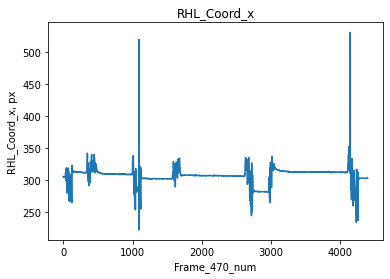

In [42]:
plt.plot(Frame_num, Coord_x)
plt.title('RHL_Coord_x')
plt.xlabel('Frame_470_num')
plt.ylabel('RHL_Coord_x, px')
plt.show()


#Перевод координат в классы

In [49]:
x_coord_without_x1 = np.array([float(i) for i in labels[1:, 0]])
x_coord_without_x4400 = np.array([float(i) for i in labels[:4399, 0]])
y_coord_without_y1 = np.array([float(i) for i in labels[1:, 0]])
y_coord_without_y4400 = np.array([float(i) for i in labels[:4399, 0]])

In [50]:
distance_without1frame = ((x_coord_without_x1 - x_coord_without_x4400)**2 + (y_coord_without_y1 - y_coord_without_y4400)**2)**0.5

In [51]:
distance_without1frame


array([0.        , 2.0226603 , 0.        , ..., 0.        , 0.27099142,
       0.        ])

In [52]:
frame1_distance  = distance_without1frame[0]
distance = np.concatenate((np.asarray([frame1_distance]), distance_without1frame))

In [58]:
metadata_for_NNet["RHL_movenment in distance"] = distance

In [59]:
Classes_RHL = []
for i in distance:
  if i > 2:
    class_of_i = 1
  else:
    class_of_i = 0
  Classes_RHL.append(class_of_i)

In [60]:
metadata_for_NNet["RHL_movenment_class"] = Classes_RHL

In [61]:
metadata_for_NNet

,470_Image name,Number of IR frame,RHL_x_coord,RHL_y_coord,RHL_movenment in distance,RHL_movenment_class
0,Image_0_220726-093824.bmp,0,305.8528137207031,342.5142822265625,0.000000,0
1,Image_2_220726-093824.bmp,0,305.8528137207031,342.5142822265625,0.000000,0
2,Image_4_220726-093825.bmp,1,304.4225769042969,342.745849609375,2.022660,1
3,Image_6_220726-093825.bmp,1,304.4225769042969,342.745849609375,0.000000,0
4,Image_8_220726-093825.bmp,2,305.0673522949219,342.552490234375,0.911850,0
...,...,...,...,...,...,...
4395,Image_8790_220726-094204.bmp,2194,303.04229736328125,343.8904113769531,0.000000,0
4396,Image_8792_220726-094204.bmp,2195,302.9398193359375,343.9485778808594,0.144926,0
4397,Image_8794_220726-094205.bmp,2195,302.9398193359375,343.9485778808594,0.000000,0
4398,Image_8796_220726-094205.bmp,2196,303.1314392089844,343.8092041015625,0.270991,0


In [53]:
# The leftmost and rightmost bin edges
first_edge, last_edge = distance.min(), distance.max()

n_equal_bins = 10  # NumPy's default
bin_edges = np.linspace(start=first_edge, stop=last_edge,num=n_equal_bins + 1, endpoint=True)

In [54]:
bin_edges


array([  0.        ,  42.12209503,  84.24419005, 126.36628508,
       168.4883801 , 210.61047513, 252.73257016, 294.85466518,
       336.97676021, 379.09885524, 421.22095026])

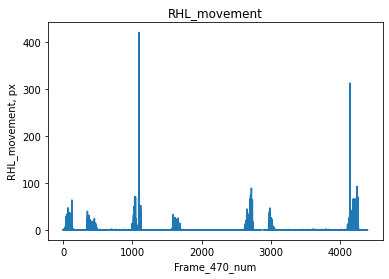

In [56]:
plt.plot(Frame_num, distance)
plt.title('RHL_movement')
plt.xlabel('Frame_470_num')
plt.ylabel('RHL_movement, px')
plt.show()


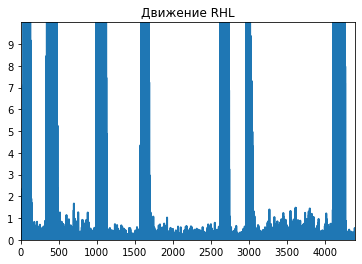

In [57]:
# plot
fig, ax = plt.subplots()

ax.plot(distance, linewidth=2.0)

ax.set(xlim=(0, 4400), xticks=np.arange(0, 4400, 500),
       ylim=(0, 10), yticks=np.arange(0, 10, 1))
plt.title('Движение RHL')

plt.show()

In [ ]:
Labels_for_Dataset = labels[0:4399:5,:].reshape(44,20,2)

In [ ]:
type(Labels_for_Dataset)

numpy.ndarray

In [ ]:
Labels_in_distance_for_Dataset = distance[0:4399:5]
Classes = []
for i in Labels_in_distance_for_Dataset:
  if i > 2:
    class_of_i = 1
  else:
    class_of_i = 0
  Classes.append(class_of_i)


In [ ]:
metadata_in_classes = np.array(Classes).reshape(44,20)

In [ ]:
metadata_in_classes

array([[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
features_train, features_test, labels_train, labels_test = train_test_split(Dataset, metadata_in_classes,
                                                                            test_size = 0.25, shuffle = True,
                                                                            random_state = seed_constant)

In [ ]:
features_train.shape

(33, 20, 1, 25, 34)

In [ ]:
labels_train.shape

(33, 20)